In [1]:
from sklearn.datasets import load_digits
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [2]:
digits = load_digits()

In [3]:
X = digits.data
y = digits.target

In [4]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [5]:
dt = DecisionTreeClassifier()

In [6]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [7]:
dt.score(testX,testY)

0.8555555555555555

In [8]:
rf = RandomForestClassifier()

In [9]:
rf.fit(trainX,trainY)

RandomForestClassifier()

In [10]:
rf.score(testX,testY)

0.9777777777777777

In [11]:
rf.feature_importances_

array([0.00000000e+00, 1.79206986e-03, 2.42610710e-02, 1.11682022e-02,
       8.75833683e-03, 1.81060912e-02, 8.46402666e-03, 9.35873113e-04,
       3.03127571e-05, 1.06790461e-02, 2.57802190e-02, 6.97722160e-03,
       1.89769045e-02, 2.83651644e-02, 5.22394299e-03, 5.63727638e-04,
       3.24736197e-05, 7.70018744e-03, 2.19483296e-02, 2.66130361e-02,
       3.03897866e-02, 4.71739949e-02, 1.02168438e-02, 4.60491603e-04,
       6.69408977e-05, 1.22965833e-02, 4.09568533e-02, 2.24498984e-02,
       2.97093825e-02, 2.50371558e-02, 2.98241788e-02, 1.10047132e-05,
       0.00000000e+00, 3.46934542e-02, 2.51537247e-02, 1.93696912e-02,
       3.54260058e-02, 1.93012881e-02, 2.82758888e-02, 0.00000000e+00,
       1.65243430e-05, 1.04987801e-02, 3.57492388e-02, 4.29792590e-02,
       2.33167749e-02, 1.56472619e-02, 1.90959287e-02, 2.31471380e-04,
       3.95059332e-05, 2.63150833e-03, 1.69286090e-02, 2.04080459e-02,
       1.48378548e-02, 2.49377363e-02, 2.90935120e-02, 2.05923064e-03,
      

In [12]:
from sklearn.ensemble import AdaBoostClassifier

In [13]:
ab = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),n_estimators=600)

In [14]:
ab.fit(trainX,trainY)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=8),
                   n_estimators=600)

In [15]:
ab.score(testX,testY)

0.9911111111111112

In [16]:
ab = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),n_estimators=600)

In [17]:
ab.fit(trainX,trainY)

AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=20),
                   n_estimators=600)

In [18]:
ab.score(testX,testY)

0.9733333333333334

In [19]:
from sklearn.datasets import load_boston
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
house_data = load_boston()

In [21]:
X = house_data.data
y = house_data.target

In [22]:
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
gbt = GradientBoostingRegressor()

In [24]:
gbt

GradientBoostingRegressor()

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [27]:
gbt.fit(trainX,trainY)

GradientBoostingRegressor()

In [28]:
test_score = np.zeros(100, dtype=np.float64)
for i, y_pred in enumerate(gbt.staged_predict(testX)):
    test_score[i] = gbt.loss_(testY, y_pred)

Text(0, 0.5, 'Least squares Loss')

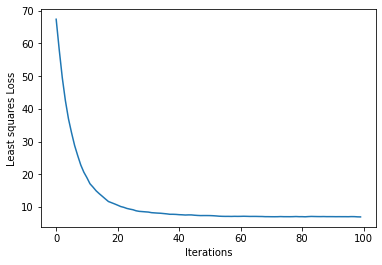

In [29]:
plt.plot(test_score)
plt.xlabel('Iterations')
plt.ylabel('Least squares Loss')

In [30]:
from sklearn.ensemble import VotingClassifier,RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

In [31]:
estimators = [ 
    ('rf',RandomForestClassifier(n_estimators=20)),
    ('svc',SVC(kernel='rbf', probability=True)),
    ('knc',KNeighborsClassifier()),
    ('abc',AdaBoostClassifier(base_estimator=DecisionTreeClassifier() ,n_estimators=20)),
    ('lr',LogisticRegression()) 
]

In [32]:
vc = VotingClassifier(estimators=estimators, voting='hard')

In [33]:
digits = load_digits()

In [34]:
X,y = digits.data, digits.target

In [35]:
trainX, testX, trainY, testY = train_test_split(X,y)

In [37]:
vc.score(testX,testY)

0.9888888888888889

In [38]:
for est,name in zip(vc.estimators_,vc.estimators):
    print (name[0], est.score(testX,testY))
    

rf 0.9688888888888889
svc 0.9911111111111112
knc 0.9844444444444445
abc 0.8533333333333334
lr 0.9622222222222222


In [39]:
vc = VotingClassifier(estimators=estimators, voting='soft', weights=[2,.1,3,2,2])

In [41]:
vc.score(testX,testY)

0.9911111111111112